<h1 style="color:violet;">Analyse the Popularity of Different Programming Languages over Time</h1>

<p style="color:whitesmoke; font-size:20px;">The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about?</p>

<h3 style="color:violet;"><em>Importing the need package</em></h3>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

<h3 style="color:violet;"><em>Loading the data</em></h3>

In [4]:
df = pd.read_csv("QueryResults.csv", parse_dates=True)

<h3 style="color:violet;"><em>Viewing top 5</em></h3>

In [5]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


<h3 style="color:violet;"><em>Renaming the columns</em></h3>

In [6]:
df.columns = ["Date", "Tag", "Post"]

In [7]:
df.head()

,Date,Tag,Post
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


<h3 style="color:violet;"><em>Checking Attributes and info about the data</em></h3>

In [8]:
df.shape

(2580, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2580 non-null   object
 1   Tag     2580 non-null   object
 2   Post    2580 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.6+ KB


<p style="color:violet;"><em>no missing values to report for now</em></p>

<h3 style="color:violet;"><em>further Explorations</em></h3>

<h4 style="color:whitesmoke;">What is the total number of post per language?</h4>

In [10]:
df.groupby("Tag")["Post"].sum()

Tag
assembly        43948
c              402492
c#            1610555
c++            804054
delphi          51654
go              72190
java          1912967
javascript    2521838
perl            68026
php           1462711
python        2179734
r              502629
ruby           228827
swift          332318
Name: Post, dtype: int64

<h4 style="color:smokewhite;">How many month of data exits per language. Which language has the fewest month with entry</h4>

In [11]:
month_entry_per_language = df.groupby("Tag")["Date"].count()
month_entry_per_language

Tag
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
Name: Date, dtype: int64

In [12]:
month_entry_per_language.idxmin()

'go'

<h3 style="color:violet;"><em>Converting the date column from object to datetime</em></h3>

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2580 non-null   datetime64[ns]
 1   Tag     2580 non-null   object        
 2   Post    2580 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 60.6+ KB


<h3 style="color:violet;"><em>Pivoting the data</em></h3>

In [15]:
reshaped_df = df.pivot(index="Date", columns="Tag", values="Post")

In [16]:
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3049.0,1491.0,105.0,424.0,3328.0,5700.0,61.0,1664.0,8622.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3198.0,1721.0,165.0,422.0,3445.0,5496.0,53.0,1547.0,9047.0,2067.0,196.0,905.0
2023-11-01,173.0,960.0,3119.0,1471.0,103.0,411.0,3299.0,5222.0,44.0,1405.0,8510.0,1999.0,157.0,873.0


In [17]:
reshaped_df.shape

(187, 14)

<h3 style="color:violet;"><em>filling the missing values in the pivoted table with 0</em></h3>

In [18]:
reshaped_df.fillna(0)

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3049.0,1491.0,105.0,424.0,3328.0,5700.0,61.0,1664.0,8622.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3198.0,1721.0,165.0,422.0,3445.0,5496.0,53.0,1547.0,9047.0,2067.0,196.0,905.0
2023-11-01,173.0,960.0,3119.0,1471.0,103.0,411.0,3299.0,5222.0,44.0,1405.0,8510.0,1999.0,157.0,873.0


<h3 style="color:violet;"><em>making the filling permanent</em></h3>

In [19]:
reshaped_df.fillna(0, inplace=True)

<h3 style="color:violet;"><em>Making plots</em></h3>

<h3 style="color:smokewhite;">The trend of Java programming over the years</h3>

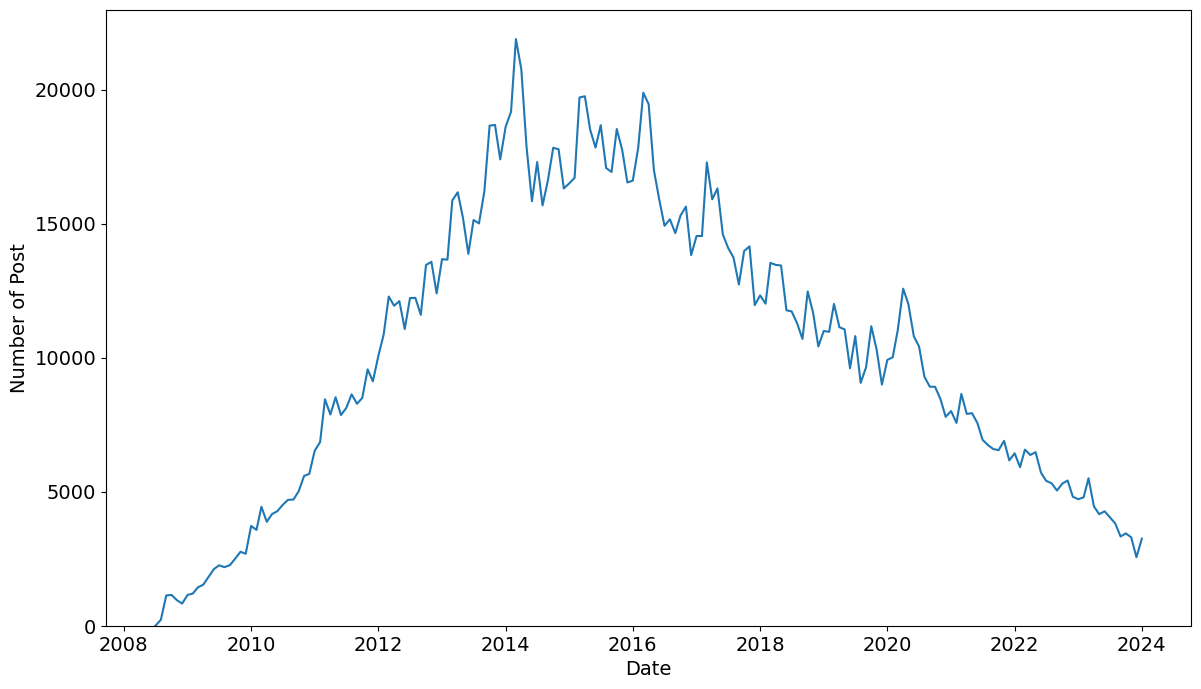

In [20]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Post", fontsize=14)
plt.ylim(0);

<h3 style="color:smokewhite;">The trend of Java & Python programming over the years</h3>

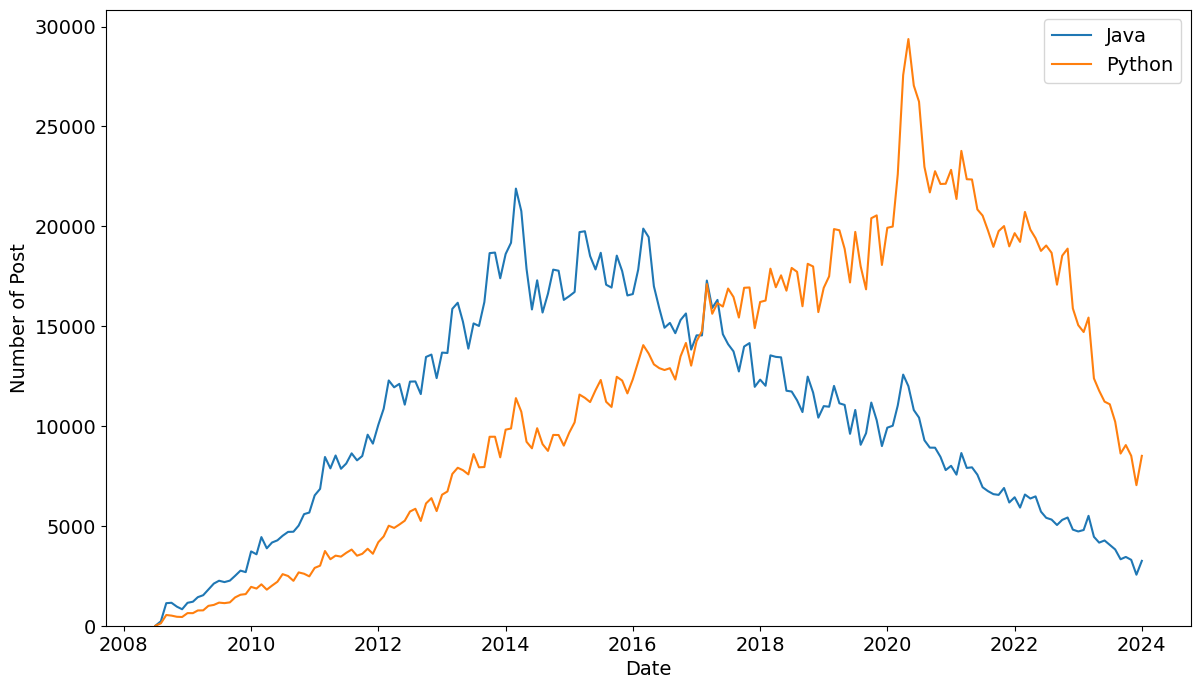

In [21]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df["java"], label="Java")
plt.plot(reshaped_df.index, reshaped_df["python"], label="Python")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Post", fontsize=14)
plt.ylim(0)
plt.legend(fontsize=14);

<h3 style="color:smokewhite;">The trend of All the programming over the years</h3>

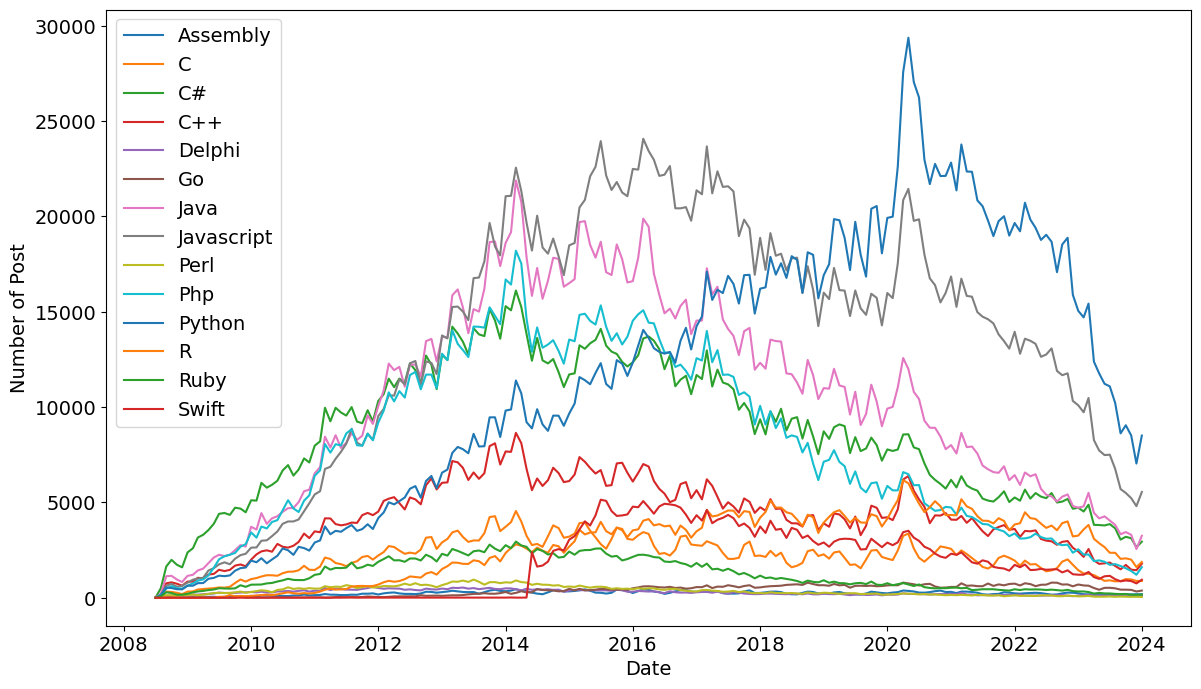

In [23]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Post", fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column.title())
    plt.legend(fontsize=14);

<h3 style="color:smokewhite;">Smoothening the plot</h3>

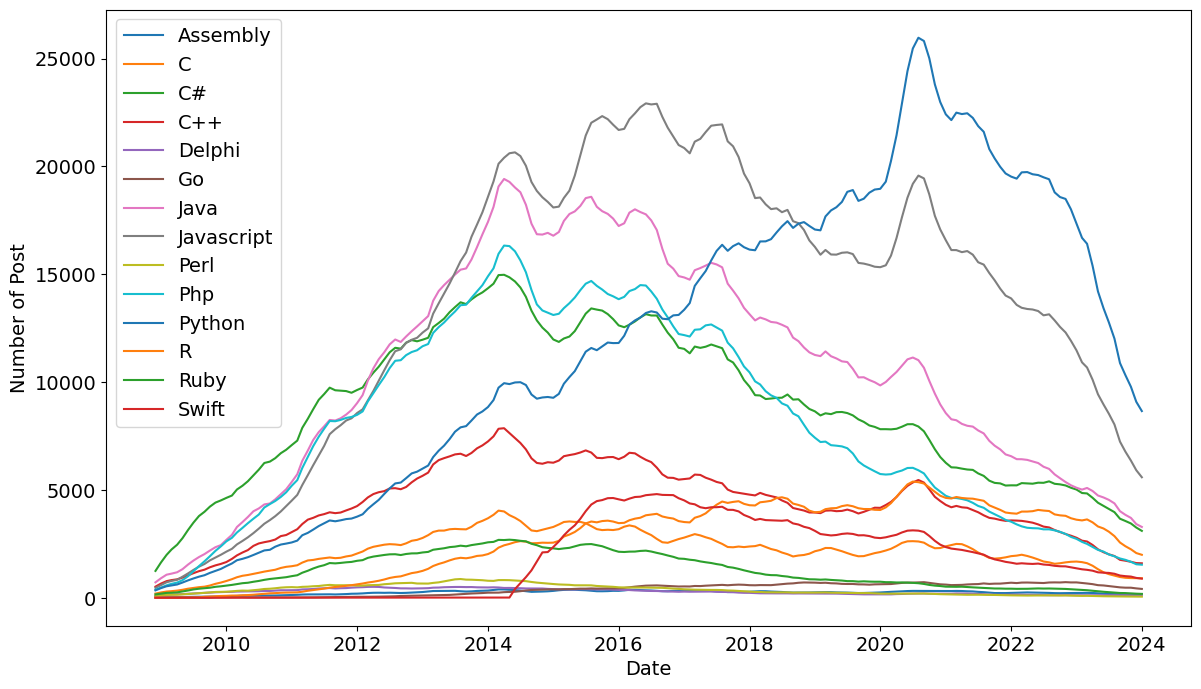

In [25]:
rolling_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Post", fontsize=14)
for column in rolling_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], label=column.title())
    plt.legend(fontsize=14);